# Structural Estimation

In [10]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1

### Part 1

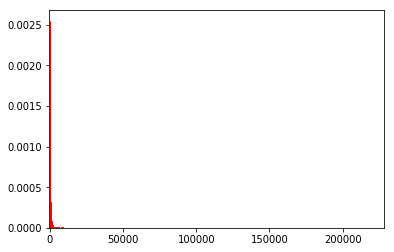

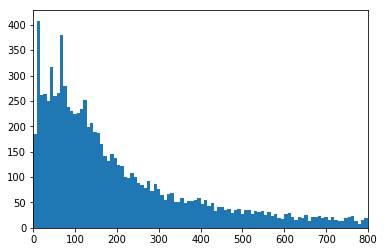

In [38]:
#Import txt file with claim data
claims = np.loadtxt("Data/clms.txt")
# Plot histograms NOTE PERCENT THING IS WRONG MUST CHANGE

plt.hist(claims, density=True, bins= 1000, stacked = True, edgecolor="red")
plt.xlim(-500, claims.max())
plt.show()

plt.hist(claims[claims<800], bins= 100)
plt.xlim(0, 800)
plt.show()

The second histogram is preferable to the first one, because the data is actually legible.

### Part b

In [43]:
#Grab initial guess
beta0 = np.var(claims)/np.mean(claims)
alpha0 = np.mean(claims)/beta0